<img src="https://www.bestdesigns.co/uploads/inspiration_images/4350/990__1511457498_404_walmart.png" alt="WALMART LOGO" />

# Walmart : predict weekly sales

## Company's Description 📇

Walmart Inc. is an American multinational retail corporation that operates a chain of hypermarkets, discount department stores, and grocery stores from the United States, headquartered in Bentonville, Arkansas. The company was founded by Sam Walton in 1962.

## Project 🚧

Walmart's marketing service has asked you to build a machine learning model able to estimate the weekly sales in their stores, with the best precision possible on the predictions made. Such a model would help them understand better how the sales are influenced by economic indicators, and might be used to plan future marketing campaigns.

## Goals 🎯

The project can be divided into three steps:

- Part 1 : make an EDA and all the necessary preprocessings to prepare data for machine learning
- Part 2 : train a **linear regression model** (baseline)
- Part 3 : avoid overfitting by training a **regularized regression model**

## Scope of this project 🖼️

For this project, you'll work with a dataset that contains information about weekly sales achieved by different Walmart stores, and other variables such as the unemployment rate or the fuel price, that might be useful for predicting the amount of sales. The dataset has been taken from a Kaggle competition, but we made some changes compared to the original data. Please make sure that you're using **our** custom dataset (available on JULIE). 🤓

## Deliverable 📬

To complete this project, your team should:

- Create some visualizations
- Train at least one **linear regression model** on the dataset, that predicts the amount of weekly sales as a function of the other variables
- Assess the performances of the model by using a metric that is relevant for regression problems
- Interpret the coefficients of the model to identify what features are important for the prediction
- Train at least one model with **regularization (Lasso or Ridge)** to reduce overfitting


## Helpers 🦮

To help you achieve this project, here are a few tips that should help you:

### Part 1 : EDA and data preprocessing

Start your project by exploring your dataset : create figures, compute some statistics etc...

Then, you'll have to make some preprocessing on the dataset. You can follow the guidelines from the *preprocessing template*. There will also be some specific transformations to be planned on this dataset, for example on the *Date* column that can't be included as it is in the model. Below are some hints that might help you 🤓

 #### Preprocessing to be planned with pandas

 **Drop lines where target values are missing :**
 - Here, the target variable (Y) corresponds to the column *Weekly_Sales*. One can see above that there are some missing values in this column.
 - We never use imputation techniques on the target : it might create some bias in the predictions !
 - Then, we will just drop the lines in the dataset for which the value in *Weekly_Sales* is missing.

**Create usable features from the *Date* column :**
The *Date* column cannot be included as it is in the model. Either you can drop this column, or you will create new columns that contain the following numeric features :
- *year*
- *month*
- *day*
- *day of week*

**Drop lines containing invalid values or outliers :**
In this project, will be considered as outliers all the numeric features that don't fall within the range : $[\bar{X} - 3\sigma, \bar{X} + 3\sigma]$. This concerns the columns : *Temperature*, *Fuel_price*, *CPI* and *Unemployment*



**Target variable/target (Y) that we will try to predict, to separate from the others** : *Weekly_Sales*

 **------------**

 #### Preprocessings to be planned with scikit-learn

 **Explanatory variables (X)**
We need to identify which columns contain categorical variables and which columns contain numerical variables, as they will be treated differently.

 - Categorical variables : Store, Holiday_Flag
 - Numerical variables : Temperature, Fuel_Price, CPI, Unemployment, Year, Month, Day, DayOfWeek

### Part 2 : Baseline model (linear regression)
Once you've trained a first model, don't forget to assess its performances on the train and test sets. Are you satisfied with the results ?
Besides, it would be interesting to analyze the values of the model's coefficients to know what features are important for the prediction. To do so, the `.coef_` attribute of scikit-learn's LinearRegression class might be useful. Please refer to the following link for more information 😉 https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

### Part 3 : Fight overfitting
In this last part, you'll have to train a **regularized linear regression model**. You'll find below some useful classes in scikit-learn's documentation :
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso

**Bonus question**

In regularized regression models, there's a hyperparameter called *the regularization strength* that can be fine-tuned to get the best generalized predictions on a given dataset. This fine-tuning can be done thanks to scikit-learn's GridSearchCV class : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

Also, you'll find here some examples of how to use GridSearchCV together with Ridge or Lasso models : https://alfurka.github.io/2018-11-18-grid-search/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Import dataset
print("Loading dataset...")
dataset = pd.read_csv("/content/Walmart_Store_sales.csv")
print("...Done.")
print()

Loading dataset...
...Done.



# 1 - EDA

In [3]:
# Basic stats
print("Number of rows : {}".format(dataset.shape[0]))
print()

print("Display of dataset: ")
display(dataset.head())
print()

print("Basics statistics: ")
data_desc = dataset.describe(include='all')
display(data_desc)
print()

print("Percentage of missing values: ")
display(100*dataset.isnull().sum()/dataset.shape[0])


Number of rows : 150

Display of dataset: 


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092



Basics statistics: 


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,150.000000,132,1.360000e+02,138.000000,132.000000,136.000000,138.000000,135.000000
unique,NaN,85,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,19-10-2012,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.866667,NaN,1.249536e+06,0.079710,61.398106,3.320853,179.898509,7.598430
std,6.231191,NaN,6.474630e+05,0.271831,18.378901,0.478149,40.274956,1.577173
min,1.000000,NaN,2.689290e+05,0.000000,18.790000,2.514000,126.111903,5.143000
25%,4.000000,NaN,6.050757e+05,0.000000,45.587500,2.852250,131.970831,6.597500
50%,9.000000,NaN,1.261424e+06,0.000000,62.985000,3.451000,197.908893,7.470000
75%,15.750000,NaN,1.806386e+06,0.000000,76.345000,3.706250,214.934616,8.150000



Percentage of missing values: 


Store            0.000000
Date            12.000000
Weekly_Sales     9.333333
Holiday_Flag     8.000000
Temperature     12.000000
Fuel_Price       9.333333
CPI              8.000000
Unemployment    10.000000
dtype: float64

#### So we can see that we have 150 rows in the dataset, with missing values for the target variable and date especially (for our case there isn't useful). So we can drop these rows.

In [4]:
# Drop lines where target values are missing and for the column 'Date'
dataset = dataset.dropna(subset=['Weekly_Sales','Date'], axis=0).reset_index(drop=True)
dataset

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092
3,4.0,28-05-2010,1857533.70,0.0,NaN,2.756,126.160226,7.896
4,15.0,03-06-2011,695396.19,0.0,69.80,4.069,134.855161,7.658
...,...,...,...,...,...,...,...,...
113,3.0,19-10-2012,424513.08,0.0,73.44,3.594,226.968844,6.034
114,14.0,18-06-2010,2248645.59,0.0,72.62,2.780,182.442420,8.899
115,17.0,11-06-2010,845252.21,0.0,57.14,2.841,126.111903,NaN
116,8.0,12-08-2011,856796.10,0.0,86.05,3.638,219.007525,NaN


In [5]:
# Univariate analysis
# Distribution of each numeric variable
num_features = ['Temperature','Fuel_Price','CPI','Unemployment']
for i in range(len(num_features)):
    fig = px.histogram(dataset[num_features[i]])
    fig.show()

In [6]:
#Create usable features from the Date column

dataset.loc[:, "Date"] = pd.to_datetime(dataset["Date"], format='%d-%m-%Y')

In [7]:
dataset.loc[:, "year"] = dataset["Date"].dt.year
dataset.loc[:, "month"] = dataset["Date"].dt.month
dataset.loc[:, "day"] = dataset["Date"].dt.day
dataset.loc[:, "day_of_week"] = dataset['Date'].dt.dayofweek


dataset = dataset.drop('Date', axis = 1)

dataset


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,day_of_week
0,6.0,1572117.54,NaN,59.61,3.045,214.777523,6.858,2011,2,18,4
1,13.0,1807545.43,0.0,42.38,3.435,128.616064,7.470,2011,3,25,4
2,6.0,1644470.66,0.0,78.89,2.759,212.412888,7.092,2010,5,28,4
3,4.0,1857533.70,0.0,NaN,2.756,126.160226,7.896,2010,5,28,4
4,15.0,695396.19,0.0,69.80,4.069,134.855161,7.658,2011,6,3,4
...,...,...,...,...,...,...,...,...,...,...,...
113,3.0,424513.08,0.0,73.44,3.594,226.968844,6.034,2012,10,19,4
114,14.0,2248645.59,0.0,72.62,2.780,182.442420,8.899,2010,6,18,4
115,17.0,845252.21,0.0,57.14,2.841,126.111903,NaN,2010,6,11,4
116,8.0,856796.10,0.0,86.05,3.638,219.007525,NaN,2011,8,12,4


In [8]:
# Basic stats
print("Number of rows : {}".format(dataset.shape[0]))
print()

print("Display of dataset: ")
display(dataset.head())
print()

print("Basics statistics: ")
data_desc = dataset.describe(include='all')
display(data_desc)
print()

print("Percentage of missing values: ")
display(100*dataset.isnull().sum()/dataset.shape[0])


Number of rows : 118

Display of dataset: 


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,day_of_week
0,6.0,1572117.54,NaN,59.61,3.045,214.777523,6.858,2011,2,18,4
1,13.0,1807545.43,0.0,42.38,3.435,128.616064,7.470,2011,3,25,4
2,6.0,1644470.66,0.0,78.89,2.759,212.412888,7.092,2010,5,28,4
3,4.0,1857533.70,0.0,NaN,2.756,126.160226,7.896,2010,5,28,4
4,15.0,695396.19,0.0,69.80,4.069,134.855161,7.658,2011,6,3,4



Basics statistics: 


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,day_of_week
count,118.000000,1.180000e+02,109.000000,107.000000,107.000000,109.000000,107.000000,118.000000,118.000000,118.000000,118.0
mean,9.949153,1.257271e+06,0.073394,60.711589,3.291542,177.718009,7.681299,2010.822034,6.338983,16.440678,4.0
std,6.066367,6.625056e+05,0.261987,17.961676,0.486784,39.816657,1.678155,0.812628,3.173664,8.209378,0.0
min,1.000000,2.689290e+05,0.000000,18.790000,2.514000,126.111903,5.143000,2010.000000,1.000000,1.000000,4.0
25%,4.250000,5.774276e+05,0.000000,45.465000,2.824000,131.637000,6.664000,2010.000000,4.000000,10.000000,4.0
50%,9.000000,1.331001e+06,0.000000,61.790000,3.308000,194.379637,7.484000,2011.000000,6.000000,16.500000,4.0
75%,15.000000,1.810591e+06,0.000000,75.430000,3.691500,214.777523,8.150000,2011.750000,9.000000,24.000000,4.0
max,20.000000,2.771397e+06,1.000000,91.650000,4.193000,226.968844,14.313000,2012.000000,12.000000,31.000000,4.0



Percentage of missing values: 


Store           0.000000
Weekly_Sales    0.000000
Holiday_Flag    7.627119
Temperature     9.322034
Fuel_Price      9.322034
CPI             7.627119
Unemployment    9.322034
year            0.000000
month           0.000000
day             0.000000
day_of_week     0.000000
dtype: float64

#### It just seems to have one value for the feature 'day_of_week. Let's check this point.

In [ ]:
dataset['day_of_week'].value_counts()

4    118
Name: day_of_week, dtype: int64

#### We just drop this variable.

In [ ]:
dataset = dataset.drop('day_of_week', axis=1)
dataset.head()


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day
0,6.0,1572117.54,NaN,59.61,3.045,214.777523,6.858,2011,2,18
1,13.0,1807545.43,0.0,42.38,3.435,128.616064,7.470,2011,3,25
2,6.0,1644470.66,0.0,78.89,2.759,212.412888,7.092,2010,5,28
3,4.0,1857533.70,0.0,NaN,2.756,126.160226,7.896,2010,5,28
4,15.0,695396.19,0.0,69.80,4.069,134.855161,7.658,2011,6,3


#### We show you in this part, the correlation matrix which allows to find the highest or not relationship between variables. Here, we can see the variable which is the most colinear with the target is 'CPI'.

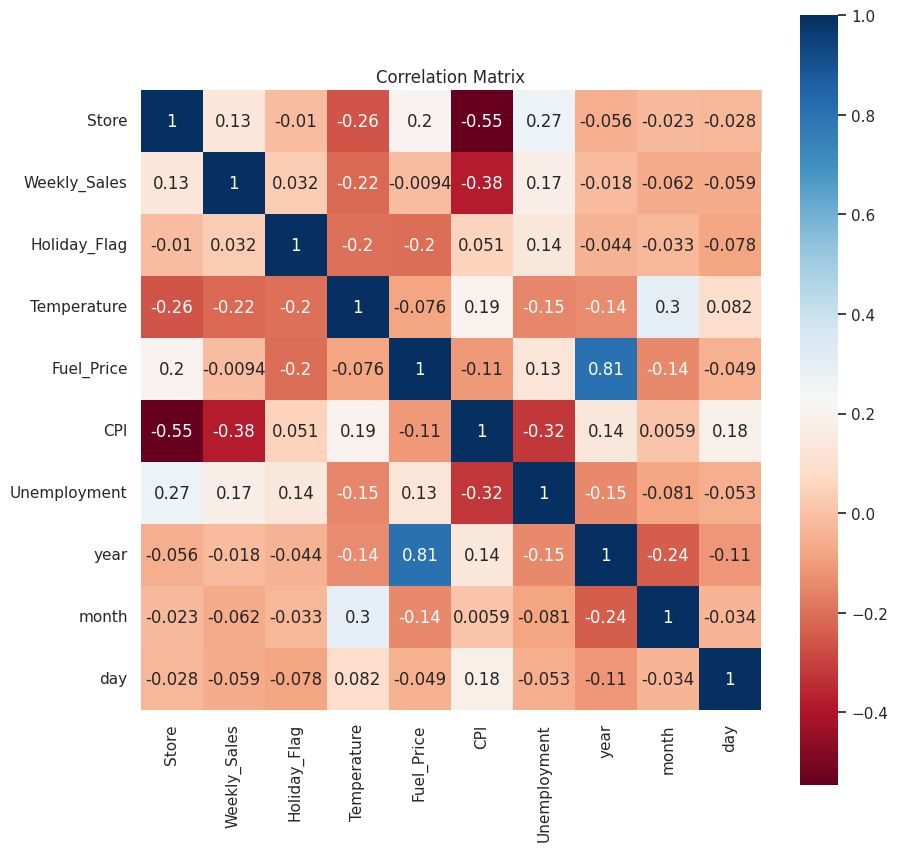

In [ ]:
corr_ = dataset.corr(method='spearman')
plt.figure(figsize=(10,10))
plt.imshow(np.outer(np.ones(10), np.arange(100)),
           cmap='RdBu',
           extent=(-10, 10, -1, 1),
           alpha=0.2)
sns.heatmap(corr_ , annot=True , cmap='RdBu')
plt.title('Correlation Matrix')
plt.show()

## Checking outliers
#### As you can see, thanks to the boxplot, only the variable 'Unemployment' has outliers. But we need to check it with the formula (mean +- 3* standard deviation).

<Figure size 1200x500 with 0 Axes>

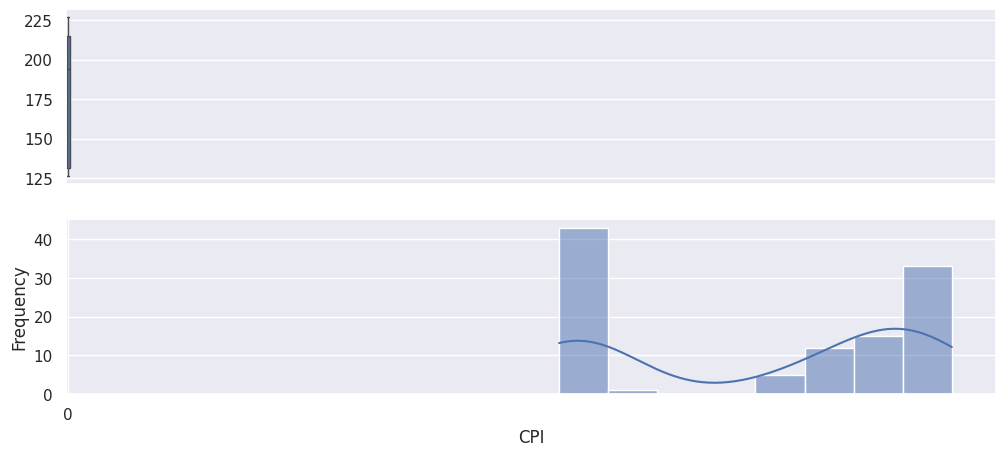

<Figure size 1200x500 with 0 Axes>

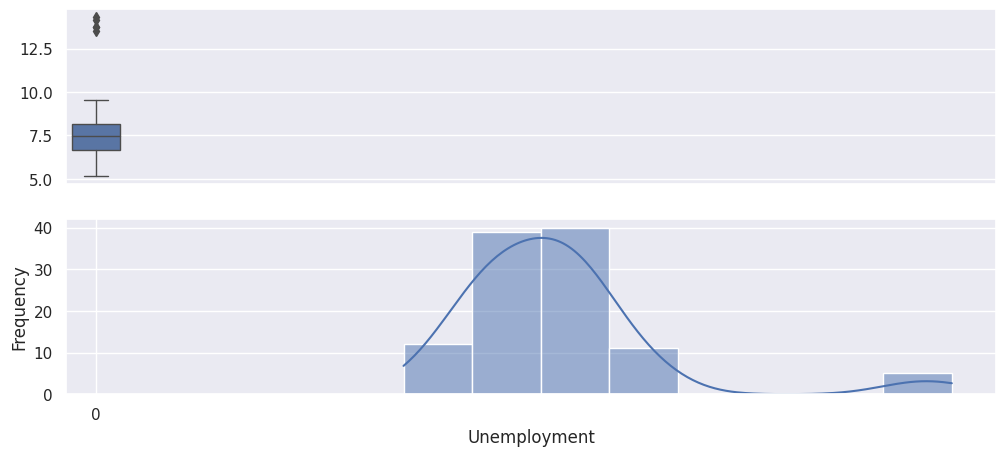

<Figure size 1200x500 with 0 Axes>

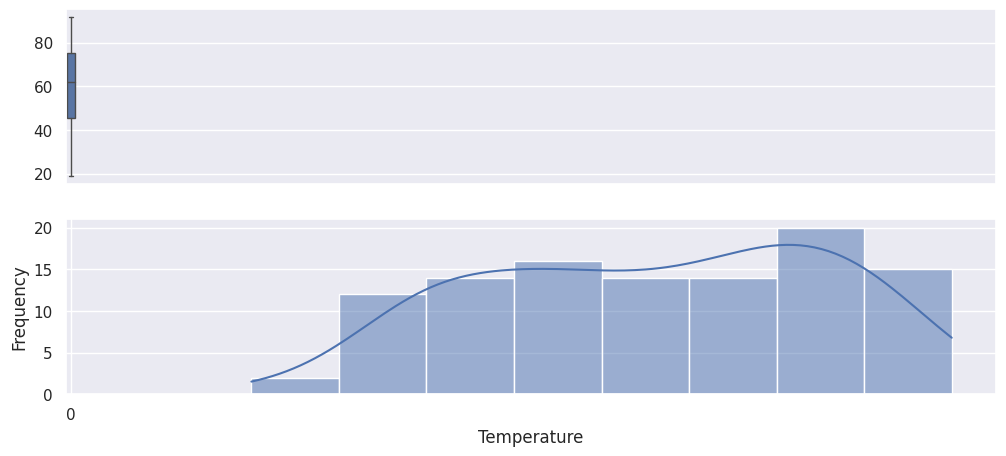

<Figure size 1200x500 with 0 Axes>

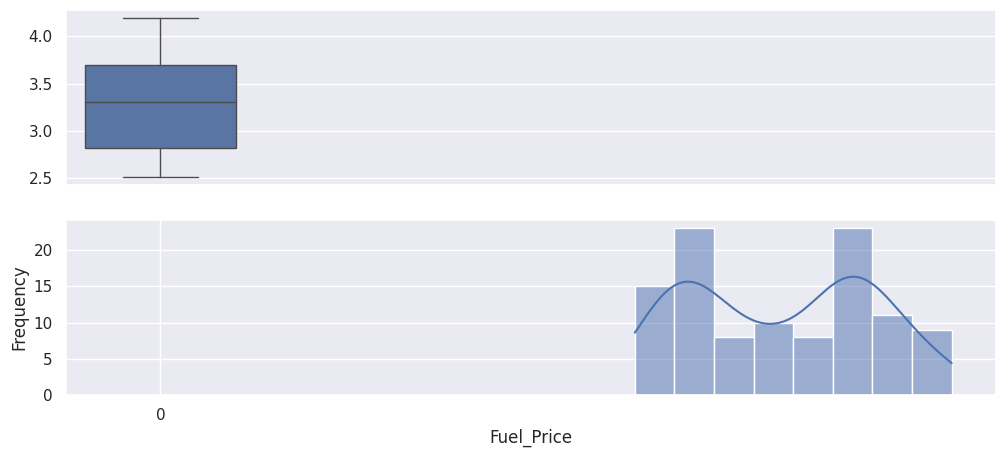

In [ ]:
col = ['CPI', 'Unemployment','Temperature','Fuel_Price']

for i in col:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(12, 5)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(dataset[i], ax=ax_box , linewidth= 1.0)
    sns.histplot(dataset[i], ax=ax_hist , bins = 8,kde=True)

### Define formula for outliers

In [ ]:
def outliers_formula (variable):

  variable_mean = np.mean(dataset[variable], axis=0)
  variable_std = np.std(dataset[variable], axis=0)

  check_outliers = [x for x in dataset[variable] if (x < variable_mean - 3 * variable_std)]  or [x for x in dataset[variable] if (x > variable_mean + 3 * variable_std)]

  print(f'There are {len(check_outliers)} outliers for {variable}')

### To define formula, it helps us to find exactly outliers. And we can see, as well, that only one feature has outliers ('Unemployment').

In [ ]:
outliers_formula('Unemployment')
outliers_formula('Temperature')
outliers_formula('CPI')
outliers_formula('Fuel_Price')


There are 5 outliers for Unemployment
There are 0 outliers for Temperature
There are 0 outliers for CPI
There are 0 outliers for Fuel_Price


### We choose to define function just to drop oultiers about 'Unemployment. Moreover, it will remove missing values too for the four variables.

In [ ]:
def remove_outliers(df,columns,n_std):

    for col in columns:

        mean = df[col].mean()
        sd = df[col].std()

        df = df[(df[col] <= mean+(n_std*sd))]

    return df

In [ ]:
features = ['Temperature', 'Fuel_Price', 'CPI','Unemployment']

for i in features:
    dataset = remove_outliers(dataset,[i],3)

dataset


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day
0,6.0,1572117.54,NaN,59.61,3.045,214.777523,6.858,2011,2,18
1,13.0,1807545.43,0.0,42.38,3.435,128.616064,7.470,2011,3,25
2,6.0,1644470.66,0.0,78.89,2.759,212.412888,7.092,2010,5,28
4,15.0,695396.19,0.0,69.80,4.069,134.855161,7.658,2011,6,3
5,20.0,2203523.20,0.0,39.93,3.617,213.023622,6.961,2012,2,3
...,...,...,...,...,...,...,...,...,...,...
109,7.0,532739.77,0.0,50.60,3.804,197.588605,8.090,2012,5,25
112,3.0,396968.80,0.0,78.53,2.705,214.495838,7.343,2010,6,4
113,3.0,424513.08,0.0,73.44,3.594,226.968844,6.034,2012,10,19
114,14.0,2248645.59,0.0,72.62,2.780,182.442420,8.899,2010,6,18



# Part 2 : Baseline model (linear regression)



In [ ]:
# Separate target variable Y from features X
print("Separating labels from features...")
target_variable = "Weekly_Sales"

X = dataset.drop(target_variable, axis = 1)
Y = dataset.loc[:,target_variable]

print("...Done.")
print()

print('Y : ')
print(Y.head())
print()
print('X :')
print(X.head())


Separating labels from features...
...Done.

Y : 
0    1572117.54
1    1807545.43
2    1644470.66
4     695396.19
5    2203523.20
Name: Weekly_Sales, dtype: float64

X :
   Store  Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment  \
0    6.0           NaN        59.61       3.045  214.777523         6.858   
1   13.0           0.0        42.38       3.435  128.616064         7.470   
2    6.0           0.0        78.89       2.759  212.412888         7.092   
4   15.0           0.0        69.80       4.069  134.855161         7.658   
5   20.0           0.0        39.93       3.617  213.023622         6.961   

   year  month  day  
0  2011      2   18  
1  2011      3   25  
2  2010      5   28  
4  2011      6    3  
5  2012      2    3  


In [ ]:
# Names of numeric/categorical columns
numeric_features = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment','year', 'month', 'day']
categorical_features = ['Store', 'Holiday_Flag']




In [ ]:
# Divide dataset Train set & Test set
print("Dividing into train and test sets...")
# WARNING : don't forget stratify=Y for classification problems
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



In [ ]:
#Create pipeline for numeric features
numeric_transformer = Pipeline(
    steps=[
    ('imputer', SimpleImputer(strategy='median')), # missing values will be replaced by columns' median
    ('scaler', StandardScaler())
])

In [ ]:
#Create pipeline for categorical features
categorical_transformer = Pipeline(
    steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # missing values will be replaced by columns' mode
    ('encoder', OneHotEncoder(drop='first', handle_unknown = 'ignore')) # first column will be dropped to avoid creating correlations between features
    ])

In [ ]:
# Use ColumnTransformer to make a preprocessor object that describes all the treatments to be done
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [ ]:
# Preprocessings on train set
print("Performing preprocessings on train set...")
print(X_train.head())
X_train = preprocessor.fit_transform(X_train)
print('...Done.')
print(X_train[0:5]) # MUST use this syntax because X_train is a numpy array and not a pandas DataFrame anymore
print()

# Preprocessings on test set
print("Performing preprocessings on test set...")
print(X_test.head())
X_test = preprocessor.transform(X_test) # Don't fit again !!
print('...Done.')
print(X_test[0:5,:]) # MUST use this syntax because X_test is a numpy array and not a pandas DataFrame anymore
print()


Performing preprocessings on train set...
    Store  Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment  \
4    15.0           0.0        69.80       4.069  134.855161         7.658   
31    4.0           0.0        81.85       3.570  129.066300         5.946   
9     7.0           0.0        36.61       3.767  192.826069         8.595   
36    1.0           1.0        38.51       2.548  211.242170         8.106   
56   18.0           0.0        73.67       2.792  132.614193         9.342   

    year  month  day  
4   2011      6    3  
31  2011      6   24  
9   2011      5   13  
36  2010      2   12  
56  2010      8    6  
...Done.
[[ 0.58589224  1.56199819 -1.05536176  0.30814094  0.18751465 -0.1099386
  -1.45366334  0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          1.          0.          0.          0.          0.
   0.          0.        ]
 [ 1.28430802  0.5704465  -1.20398254 -1.503

In [ ]:
# Train model
print("Train model...")
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
print("...Done.")


Train model...
...Done.


### To sum up, we see with the R2 score and the cross validation that the model is overfitting. Indeed, when you compare the sum of R2 score on test set + the std in crossvalidation, it's lower than R2 score on training set.

In [ ]:
# Print R^2 scores
print("R2 score on training set : ", regressor.score(X_train, Y_train))
print("R2 score on test set : ", regressor.score(X_test, Y_test))


R2 score on training set :  0.983619043388679
R2 score on test set :  0.958473828110397


In [ ]:
# Perform 5-fold cross-validation
print("5-fold cross-validation...")
scores = cross_val_score(regressor, X_train, Y_train, cv=5)
print('The cross-validated accuracy is : ', scores.mean())
print('The standard deviation is : ', scores.std())


5-fold cross-validation...
The cross-validated accuracy is :  0.9384907654469578
The standard deviation is :  0.017073620119623555


### Lest' see now with regularization

# Part 3 : Fight overfitting

## Ridge

In [ ]:
# Perform grid search
print("Grid search...")
ridge1 = Ridge()
# Grid of values to be tested
params = {
    'alpha': np.arange(0,0.05,100)
}
gridsearch_ridge = GridSearchCV(ridge1, param_grid = params, cv = 10, verbose = 1) # cv : the number of folds to be used for CV
gridsearch_ridge.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch_ridge.best_params_)
print("Best R2 score : ", gridsearch_ridge.best_score_)


Grid search...
Fitting 10 folds for each of 1 candidates, totalling 10 fits
...Done.
Best hyperparameters :  {'alpha': 0.0}
Best R2 score :  0.9360990883852199


In [ ]:
# Print R^2 scores
print("R2 score on training set : ", gridsearch_ridge.score(X_train, Y_train))
print("R2 score on test set : ", gridsearch_ridge.score(X_test, Y_test))

R2 score on training set :  0.983619043388679
R2 score on test set :  0.9584738281104107


In [ ]:
# Perform 10-fold cross-validation to evaluate the generalized R2 score obtained with a Ridge model
scores = cross_val_score(gridsearch_ridge, X_train, Y_train, cv=10)
print('The cross-validated R2-score is : ', scores.mean())
print('The standard deviation is : ', scores.std())

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
The cross-validated R2-score is :  0.9360990883852199
The standard deviation is :  0.02706700912224686


## Lasso

In [ ]:
# Perform grid search
print("Grid search...")
lasso1 = Lasso()
# Grid of values to be tested
params = {
    'alpha': [0, 1, 10, 50, 75, 100, 300, 500, 750, 1000]
}
gridsearch_lasso = GridSearchCV(lasso1, param_grid = params, cv = 10) # cv : the number of folds to be used for CV
gridsearch_lasso.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch_lasso.best_params_)
print("Best R2 score : ", gridsearch_lasso.best_score_)

Grid search...
...Done.
Best hyperparameters :  {'alpha': 50}
Best R2 score :  0.9279550993436754


In [ ]:
# Print R^2 scores
print("R2 score on training set : ", gridsearch_lasso.score(X_train, Y_train))
print("R2 score on test set : ", gridsearch_lasso.score(X_test, Y_test))

R2 score on training set :  0.9818541399925064
R2 score on test set :  0.9745506844605816


In [ ]:
# Perform 10-fold cross-validation to evaluate the generalized R2 score obtained with a Ridge model
scores = cross_val_score(gridsearch_lasso, X_train, Y_train, cv=10)
print('The cross-validated R2-score is : ', scores.mean())
print('The standard deviation is : ', scores.std())

The cross-validated R2-score is :  0.9282293928005936
The standard deviation is :  0.026634257663538257


In [ ]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = gridsearch_lasso.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()


Predictions on training set...
...Done.
[ 636114.28782328 2067382.58897913  501267.19004182 1591142.49138067
 1079434.13850061 2125493.17258526 2497234.12195679 1284077.30431235
 2011330.23282155  462996.71364608  893927.13919919 1753936.10600211
 1117798.88600775  367477.58204396 2203874.92644509 2115134.81087359
 1913466.33032493 2004074.1785653   249514.75279502  650916.22072272
 2376590.2605625   469075.43953253 1567516.40675541  460572.07360152
  491334.36504007 1947053.08938884 1896232.18177651 2111750.54205685
  494201.35775796 1373527.33982498 1610460.09490349  605890.29899353
 1515596.91514258  594048.88051262  916037.87421436 1909597.75687203
  740362.73932214 1653238.74507702 2089752.17646701 1413328.68055633
  818286.72123776 1347092.91040746  890403.46140488  414464.0088132
 1332264.68994381 1491623.51274123 1617325.48121262 1114414.80390731
  483199.66073979  913716.10835364 1911010.57713936 1883355.9027761
  992190.02038922  415436.02112353  155996.58652619 1963507.90154

In [ ]:
column_names = []
for name, pipeline, features_list in preprocessor.transformers_:
    if name == 'num':
        features = features_list
    else:
        features = pipeline.named_steps['encoder'].get_feature_names_out()
    column_names.extend(features)

In [ ]:
#Compute abs() and sort values
coefs = pd.DataFrame(index = (column_names), data = regressor.coef_.transpose(), columns=['coefficients'])
feature_importance = abs(coefs).sort_values(by = 'coefficients')
feature_importance

,coefficients
month,3.888976e+04
day,4.673073e+04
Temperature,5.761883e+04
x0_11.0,5.914138e+04
x0_6.0,6.659450e+04
Fuel_Price,8.370849e+04
Unemployment,9.357707e+04
year,9.700821e+04
x0_7.0,1.221929e+05
x1_1.0,1.315105e+05


In [ ]:
data_dict = {
    'Feature': column_names,
    'Coef_Lasso': gridsearch_lasso.best_estimator_.coef_,
    'Coef_Ridge': gridsearch_ridge.best_estimator_.coef_
            }

coefficients = pd.DataFrame(data = data_dict)
coefficients.head()

,Feature,Coef_Lasso,Coef_Ridge
0,Temperature,-53035.363310,-5.761883e+04
1,Fuel_Price,-97031.767561,-8.370849e+04
2,CPI,278283.457046,1.635968e+06
3,Unemployment,-59981.579319,-9.357707e+04
4,year,35772.871528,-9.700821e+04
